In [887]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


Exploratory Data Analysis

explanation about eda

In [888]:
train = pd.read_csv('~/Documents/AmesHousingML/Ames_HousePrice.csv') 

In [889]:
train.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [890]:
train.drop(columns="Unnamed: 0",inplace=True)

In [891]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [892]:
train.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


# Data Preprocessing and Cleaning

In [893]:
train.shape

(2580, 81)

In [894]:
train = train.drop_duplicates()

In [895]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage      462
Alley           2411
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2570
Fence           2054
MiscFeature     2482
dtype: int64

For no particular reason, I'll start data cleaning with garage and its following columns to remove nan for a more complete dataframe.

In [896]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [897]:
train['GarageType'].fillna('NoGarage', inplace=True)

In [898]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', 'NoGarage', '2Types',
       'CarPort'], dtype=object)

In [899]:
train[train.GarageYrBlt.isna()].GarageType.unique()

array(['NoGarage', 'Detchd'], dtype=object)

In [900]:
train['GarageYrBlt'].fillna(0, inplace=True)

In [901]:
train['GarageType'].fillna(0, inplace=True)

In [902]:
train['GarageFinish'].fillna('NoGarage', inplace=True)

In [903]:
train['GarageQual'].fillna('NoGarage', inplace=True)

In [904]:
train['GarageCond'].fillna('NoGarage', inplace=True)

In [905]:
train['Alley'].fillna('NoAlley', inplace=True)

In [906]:
train.Neighborhood.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [907]:
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'CollgCr'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Somerst'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Gilbert'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'BrDale'").median())

LotFrontage    70.0
dtype: float64
LotFrontage    72.0
dtype: float64
LotFrontage    63.0
dtype: float64
LotFrontage    21.0
dtype: float64


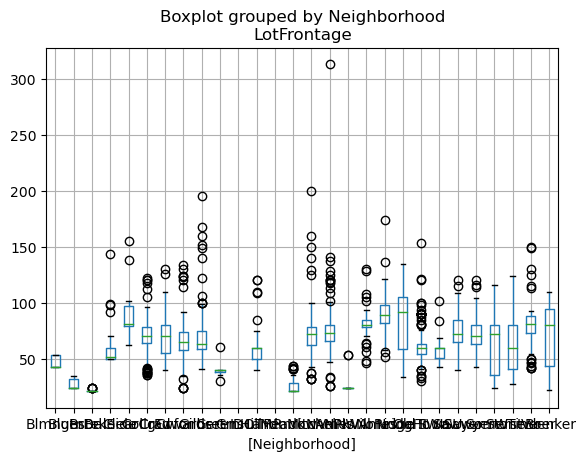

In [908]:
fig = train[['LotFrontage', 'Neighborhood']].boxplot(by='Neighborhood')
#plt.xticks(rotation=90)
plt.show()

I saw that the median values for each neighborhood varied, therefore I believe it would be irresponsible to use a shared median or mean among all missing values. Therefore, I will use the median value specific to the neighborhood that the house is located.

In [909]:
# Fill missing values in 'LotFrontage' column with median based on 'Neighborhood'
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [910]:
train.FireplaceQu.unique()

array(['Gd', nan, 'Ex', 'TA', 'Fa', 'Po'], dtype=object)

In [911]:
train['FireplaceQu'].fillna("NoFireplace", inplace=True)

In [912]:
train.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [913]:
train['MasVnrType'].fillna("None", inplace=True)

In [914]:
train['MasVnrArea'].fillna(0, inplace=True)

In [915]:
print(train.BsmtQual.unique())
print(train.BsmtCond.unique())
print(train.BsmtExposure.unique())
print(train.BsmtFinType1.unique())
print(train.BsmtFinType2.unique())

['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['No' 'Mn' nan 'Gd' 'Av']
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


In [916]:
train['BsmtQual'].fillna("NoBsmt", inplace=True)
train['BsmtCond'].fillna("NoBsmt", inplace=True)
train['BsmtExposure'].fillna("NoBsmt", inplace=True)
train['BsmtFinType1'].fillna("NoBsmt", inplace=True)
train['BsmtFinType2'].fillna("NoBsmt", inplace=True)

In [917]:
train.Electrical.value_counts()

SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [918]:
train['Electrical'].fillna("SBrkr", inplace=True)

Below we evaluate MiscFeature, which seemed to have a large amount of null values.

In [919]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Othr', 'Gar2', 'TenC'], dtype=object)

In [920]:
train.MiscFeature.value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [921]:
#looking at the total percentage of houses that include a MiscFeature... which is below 5%
((train.MiscFeature.isna().count() - train.MiscFeature.isna().sum()) / (train.MiscFeature.isna().count()) ) * 100

3.7611477316789452

In [922]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('MiscFeature', axis=1, inplace=True)

In [923]:
# as well I have to remove the values associated with the MiscFeature
train.drop('MiscVal', axis=1, inplace=True)

Below I will do the same with PoolQC and PoolSF

In [924]:
((train.PoolQC.isna().count() - train.PoolQC.isna().sum()) / (train.PoolQC.isna().count()) ) * 100

0.34897246994959286

In [925]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('PoolQC', axis=1, inplace=True)

In [926]:
train.drop('PoolArea', axis=1, inplace=True)

In [927]:
train['Fence'].fillna("NoFence", inplace=True)

In [928]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage     3
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

In [929]:
train[train.LotFrontage.isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
109,916253320,1502,330000,120,RM,NaN,9763,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,NoFence,9,2007,WD,Normal
683,916252170,1295,230000,120,RM,NaN,8239,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,NoFence,11,2006,WD,Normal
1204,907230240,1320,137000,160,RH,NaN,3612,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,NoFireplace,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,MnPrv,6,2006,WD,Normal


In [930]:
train

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,60.0,7890,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,NoFence,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,NoFence,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NoFireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,NoFence,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NoFireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,NoFence,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NoFireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,NoFence,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,51.5,8854,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,NoFence,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,65.0,13680,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,NoFence,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NoFireplace,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,NoFence,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,70.0,8826,Pave,NoAlley,

In [931]:
# used the following commented code to check specific cases of the LotFootage not cleaning correctly
# turns out there were a few neighborhoods that don't have any values in the column, very minimal ~3
# train[train.PID == 916253320]
# train.Neighborhood.value_counts()
train = train[(train['Neighborhood'] != 'GrnHill') & (train['Neighborhood'] != 'Landmrk')]

In [932]:
#train[train['BsmtFinSF1'].isna()] #one edge case where there is no bsmt so set zeroes, same for rest
train['BsmtFinSF1'].fillna(0, inplace=True)   
train['BsmtFinSF2'].fillna(0, inplace=True)   
train['BsmtUnfSF'].fillna(0, inplace=True)   
train['TotalBsmtSF'].fillna(0, inplace=True)   
train['BsmtFullBath'].fillna(0, inplace=True)   
train['BsmtHalfBath'].fillna(0, inplace=True)   
train['GarageCars'].fillna(0, inplace=True)   
train['GarageArea'].fillna(0, inplace=True)   

In [933]:
nulls = train.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

We have cleaned the missing values.

# Exploratory Data Analysis

The sale price of the houses in the dataset have a right skew.

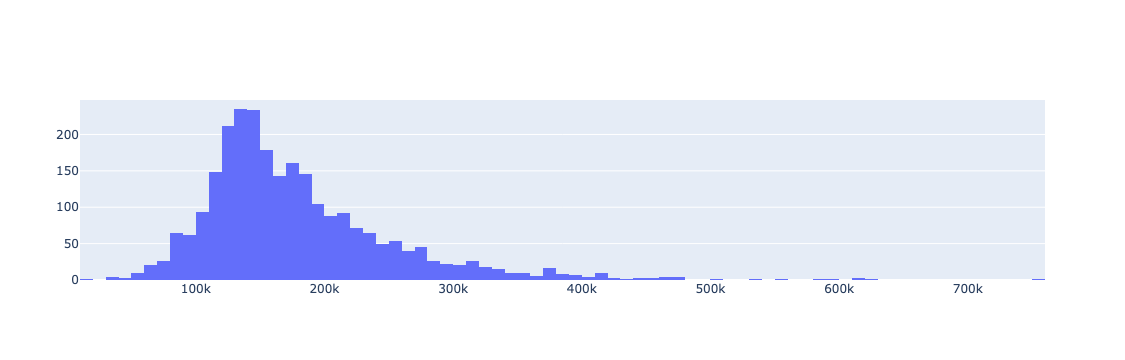

In [934]:
sp_fig = go.Figure(data=[go.Histogram(x=train.SalePrice)])
sp_fig

In [935]:
train.SalePrice.describe()

count      2576.000000
mean     177990.228261
std       75017.585880
min       12789.000000
25%      129900.000000
50%      159900.000000
75%      209500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [936]:
train[train["SalePrice"] < 35000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
427,902207130,832,12789,30,RM,68.0,9656,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,NoFence,6,2010,WD,Abnorml
558,902477120,720,34900,30,C (all),60.0,7879,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,NoGarage,0.0,NoGarage,0.0,0.0,NoGarage,NoGarage,N,0,523,115,0,0,GdWo,11,2009,WD,Abnorml


The mean is higher than the median, and we can see many outliers, which can impact the results of our models.

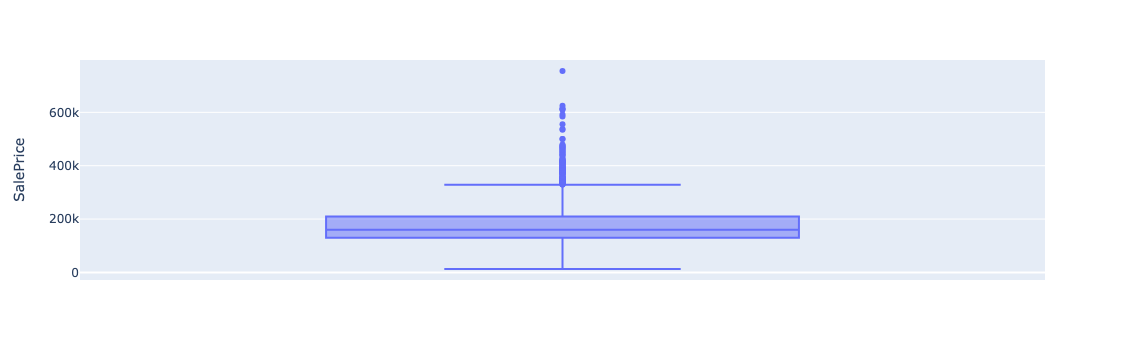

In [937]:
px.box(train,y='SalePrice')

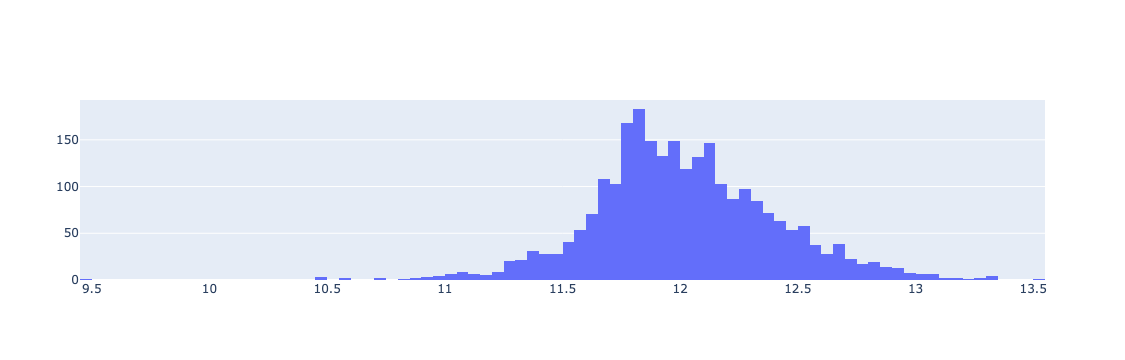

In [938]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

In [939]:
logSalePrice = np.log(train.SalePrice)

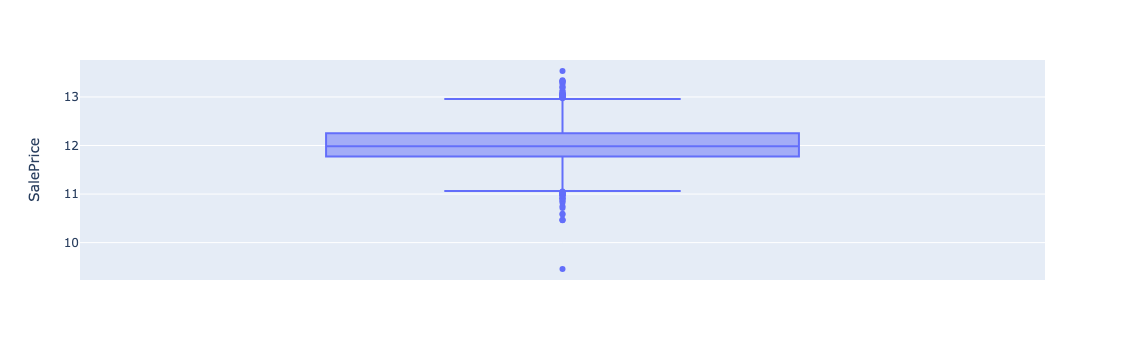

In [940]:
px.box(logSalePrice,y='SalePrice')

As we can see, there are many outliers in the data. Although the typical accepted range is usually 1.5 times the IQR, we will do 3 times the IQR to try and conserve some of the value in those outliers

## Finding & Dealing with Outliers

In [941]:
train.shape

(2576, 77)

In [942]:
# Q1 = train['SalePrice'].quantile(.25)
# Q3 = train['SalePrice'].quantile(.75)
# IQR = Q3 - Q1
# new_bounds = Q3 + 3 * IQR

In [943]:
# train.drop(train[train['SalePrice'] > new_bounds].index, axis=0, inplace = True)

In [944]:
train.shape

(2576, 77)

In [945]:
#train set - outliers comes out to 23 records removed
2576 - 2553

23

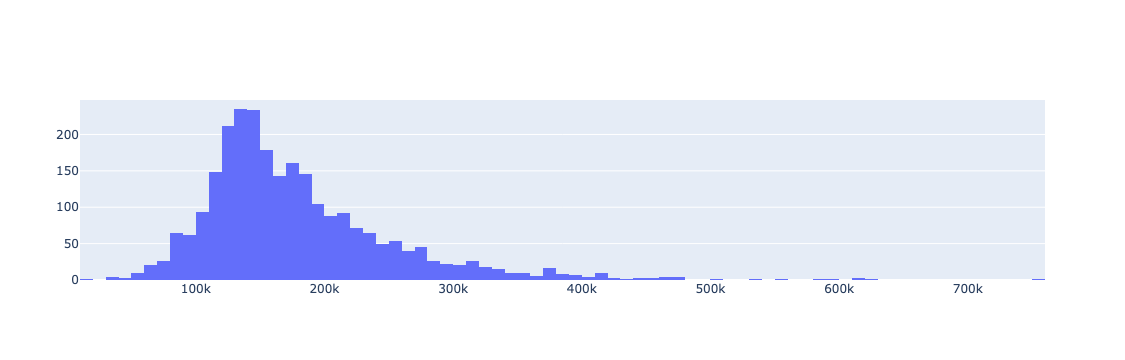

In [946]:
go.Figure(data=[go.Histogram(x=train.SalePrice)])

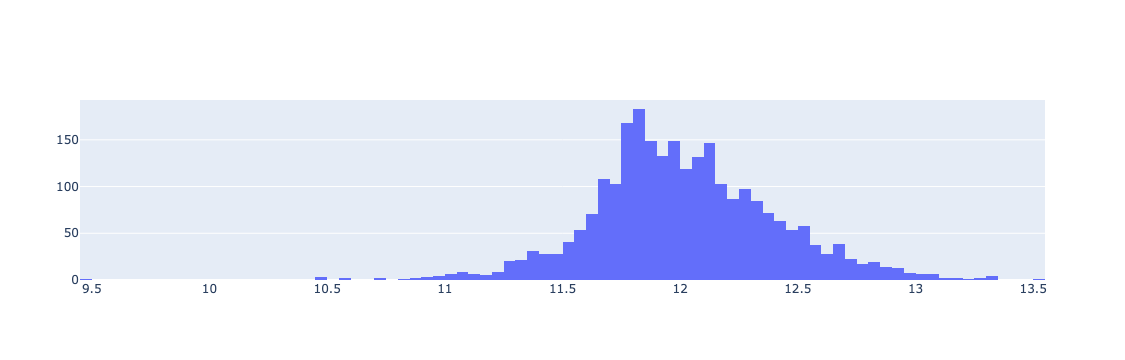

In [947]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

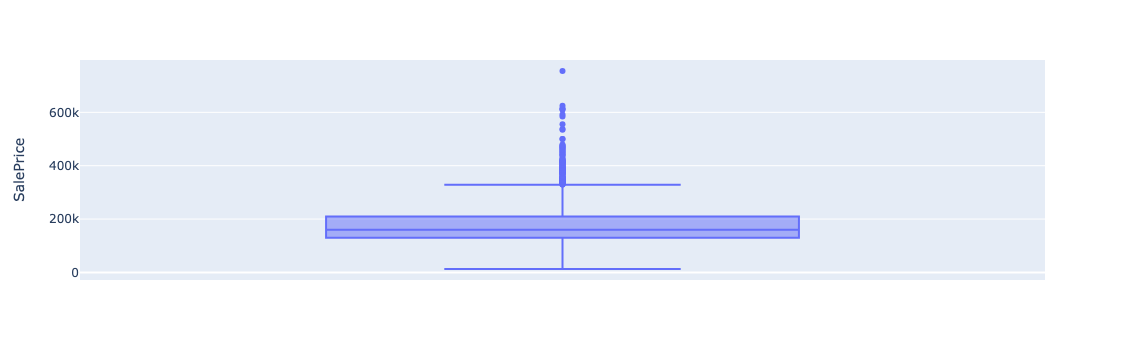

In [948]:
px.box(train,y='SalePrice')

### Below we are going to break the categorical features down into either onehot encoded or ordinal

In [949]:
train['BsmtFinType1'].unique()

array(['Rec', 'GLQ', 'ALQ', 'Unf', 'NoBsmt', 'BLQ', 'LwQ'], dtype=object)

In [950]:
train_ords = train
ordinal_mapping_BsmtFinType = {'GLQ': 3,
       'ALQ': 2,
       'BLQ': 1,
       'Rec': 3, 
       'LwQ': 2, 
       'Unf': 1,
       'NoBsmt': 0}
train_ords['BsmtFinType1'] = train_ords['BsmtFinType1'].map(ordinal_mapping_BsmtFinType)
train_ords['BsmtFinType2'] = train_ords['BsmtFinType2'].map(ordinal_mapping_BsmtFinType)

In [951]:
train['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [952]:
ordinal_mapping_Exter = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3, 
       'Fa': 2, 
       'Po': 1  }
train_ords['ExterQual'] = train_ords['ExterQual'].map(ordinal_mapping_Exter)
train_ords['ExterCond'] = train_ords['ExterCond'].map(ordinal_mapping_Exter)
train_ords['HeatingQC'] = train_ords['HeatingQC'].map(ordinal_mapping_Exter)
train_ords['KitchenQual'] = train_ords['KitchenQual'].map(ordinal_mapping_Exter)

In [953]:
ordinal_mapping_bsmt = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3, 
       'Fa': 2, 
       'Po': 1,
        'NoBsmt': 0}
train_ords['BsmtQual'] = train_ords['BsmtQual'].map(ordinal_mapping_bsmt)
train_ords['BsmtCond'] = train_ords['BsmtCond'].map(ordinal_mapping_bsmt)

In [954]:
ordinal_mapping_garage = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3, 
       'Fa': 2, 
       'Po': 1,
        'NoGarage': 0}
train_ords['GarageQual'] = train_ords['GarageQual'].map(ordinal_mapping_garage)
train_ords['GarageCond'] = train_ords['GarageCond'].map(ordinal_mapping_garage)

In [955]:
train_ords.FireplaceQu

0                Gd
1       NoFireplace
2       NoFireplace
3       NoFireplace
4       NoFireplace
           ...     
2575             Gd
2576             Gd
2577    NoFireplace
2578             TA
2579             TA
Name: FireplaceQu, Length: 2576, dtype: object

In [956]:
ordinal_mapping_fireplace = {
       'Ex': 5,
       'Gd': 4,
       'TA': 3, 
       'Fa': 2, 
       'Po': 1,
        'NoFireplace': 0}
train_ords['FireplaceQu'] = train_ords['FireplaceQu'].map(ordinal_mapping_fireplace)

In [957]:
ordinal_mapping_bsmtexpo = {
       'Gd': 4,
       'Av': 3,
       'Mn': 2, 
       'No': 1, 
       'NoBsmt': 0 }
train_ords['BsmtExposure'] = train_ords['BsmtExposure'].map(ordinal_mapping_bsmtexpo)

In [958]:
train_ords.Fence.unique()

array(['NoFence', 'GdWo', 'MnPrv', 'GdPrv', 'MnWw'], dtype=object)

In [959]:
ordinal_mapping_fence = {
       'GdPrv': 2,
       'MnPrv': 1,
       'GdWo': 2, 
       'MnWw': 1, 
       'NoFence': 0 }
train_ords['Fence'] = train_ords['Fence'].map(ordinal_mapping_fence)

In [960]:
ordinal_mapping_grgFinish = {
       'Fin': 3,
       'RFn': 2,
       'Unf': 1, 
       'NoGarage': 0}
train_ords['GarageFinish'] = train_ords['GarageFinish'].map(ordinal_mapping_grgFinish)

In [961]:
train_ords

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,60.0,7890,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,3,1,3,238.0,1,0.0,618.0,856.0,GasA,3,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,3,4,Typ,1,4,Detchd,1939.0,1,2.0,399.0,3,3,Y,0,0,0,0,166,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4,3,2,3,552.0,2,393.0,104.0,1049.0,GasA,3,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,4,5,Typ,0,0,Attchd,1984.0,3,1.0,266.0,3,3,Y,0,105,0,0,0,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3,3,1,2,737.0,1,0.0,100.0,837.0,GasA,5,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,4,5,Typ,0,0,Detchd,1930.0,1,1.0,216.0,3,1,N,154,0,42,86,0,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,4,4,BrkTil,2,3,1,1,0.0,1,0.0,405.0,405.0,GasA,4,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,3,6,Typ,0,0,Detchd,1940.0,1,1.0,281.0,3,3,N,0,0,168,0,111,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,1,3,643.0,1,0.0,167.0,810.0,GasA,5,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,2001.0,3,2.0,528.0,3,3,Y,0,45,0,0,0,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,51.5,8854,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,952.0,952.0,Grav,2,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,2,4,Typ,1,4,Detchd,1916.0,1,1.0,192.0,2,1,P,0,98,0,0,40,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,65.0,13680,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,3,3,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,5,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,3,8,Min2,1,4,Attchd,1955.0,1,2.0,452.0,3,3,Y,0,0,0,0,0,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,3,1,1,284.0,1,0.0,717.0,1001.0,GasA,3,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,3,8,Typ,0,0,2Types,1949.0,1,3.0,871.0,3,3,Y,0,0,0,0,0,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,70.0,8826,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,4,3,PConc,4,3,1,3,841.0,1,0.0,144.0,985.0,GasA,5,Y,SBrkr,985,857,0,1.0,0.0,2,1,3,1,4,7,Typ,1,3,Attchd,2000.0,3,2.0,486.0,3,3,

Lets look at the categorical variables as well:

In [962]:
train_cats = train_ords.select_dtypes(exclude=[np.number])

train_cats_encoded = pd.get_dummies(train_ords, columns=train_cats.columns, drop_first=True)

train_cats_encoded

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,909176150,856,126000,30,60.0,7890,6,6,1939,1950,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,856,0,0,1.0,0.0,1,0,2,1,3,4,1,4,1939.0,1,2.0,399.0,3,3,0,0,0,0,166,0,3,2010,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,4,3,4,3,2,3,552.0,2,393.0,104.0,1049.0,3,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,0,1984.0,3,1.0,266.0,3,3,0,105,0,0,0,0,2,2009,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

In [963]:
train.dtypes.value_counts()

int64      39
object     27
float64    11
dtype: int64

In [964]:
OH_encoder = OneHotEncoder(sparse_output = False, drop = 'first')
cat_cols = list(train.select_dtypes(include='object').columns)
encoded_nums = OH_encoder.fit_transform(train[cat_cols])
encoded_cols = list(OH_encoder.get_feature_names_out())
train[encoded_cols] = encoded_nums
train = train.drop(columns=cat_cols)
train

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,909176150,856,126000,30,60.0,7890,6,6,1939,1950,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,856,0,0,1.0,0.0,1,0,2,1,3,4,1,4,1939.0,1,2.0,399.0,3,3,0,0,0,0,166,0,3,2010,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

# Feature Engineering

In [965]:
train['TotalHouseSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train.TotalHouseSF

0       1712.0
1       2098.0
2       1838.0
3       1444.0
4       2475.0
         ...  
2575    1904.0
2576    1733.0
2577    3003.0
2578    2827.0
2579    2688.0
Name: TotalHouseSF, Length: 2576, dtype: float64

In [966]:
train['TotalBathroomCount'] = train['BsmtFullBath'] + train['FullBath'] + (0.5 * train['BsmtHalfBath']) + (0.5 * train['HalfBath'])
train.TotalBathroomCount

# BsmtFullBath: Basement full bathrooms

# BsmtHalfBath: Basement half bathrooms

# FullBath: Full bathrooms above grade

# HalfBath: Half baths above grade

0       2.0
1       3.0
2       1.0
3       1.0
4       3.5
       ... 
2575    1.0
2576    2.0
2577    2.0
2578    3.5
2579    2.5
Name: TotalBathroomCount, Length: 2576, dtype: float64

I saw there was alot of mention of SF for outdoor additions to houses, I wanted to create a way to encapture the value there:

In [967]:
train['QualityOutdoorSF'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] # + train['PoolArea']

# WoodDeckSF: Wood deck area in square feet

# OpenPorchSF: Open porch area in square feet

# EnclosedPorch: Enclosed porch area in square feet

# 3SsnPorch: Three season porch area in square feet

# ScreenPorch: Screen porch area in square feet

# PoolArea: Pool area in square feet ---- already removed this column

train.QualityOutdoorSF

Also, two of our higher predicting was YrBuilt and YrRemodAdd, can we combine somehow to get that value out of one feature?

In [968]:
train['YearAndRemodAvg'] = (train['YearRemodAdd'] + train['YearBuilt'])/2

Potentially a lot_frontage to lot_size ratio?







FullHouseSF - Lot Size?

In [969]:
train['NonHouseSF'] = train['TotalHouseSF'] - train['LotArea']

Quality in house stuff?

In [970]:
#LowQualFinSF: Low quality finished square feet (all floors)
train['HighQualFinSF'] = train['TotalHouseSF'] - train['LowQualFinSF']

In [971]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'TotalHouseSF', 'TotalBathroomCount',
       'QualityOutdoorSF', 'YearAndRemodAvg', 'NonHouseSF', 'HighQualFinSF'],
      dtype='object', length=214)

In [972]:
train['HouseLotRatio'] = train['TotalHouseSF'] / train['LotArea'] * 100
train['FrontageLotRatio'] = train['LotFrontage'] / train['LotArea'] * 100
train['QualityOutdoorLotRatio'] = train['QualityOutdoorSF'] / train['LotArea'] * 100


In [980]:
output_file = 'clean_data_ordinal.csv'

train.to_csv(output_file, index=False, mode='w')

print(f"DataFrame exported to '{output_file}' in the same working directory.")

DataFrame exported to 'clean_data_ordinal.csv' in the same working directory.


Let's start with a simple linear regression on the basic numeric variables we got after making one feature and clearing some multicollinearity.

I was originally using the full dataset to train my model and test it on the same data. We will now look at how the results are from splitting the data.

In [974]:
train_cats

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,Y,SBrkr,Typ,Detchd,Y,WD,Normal
1,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,N,WD,Normal
3,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,N,WD,Normal
4,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,Grav,N,FuseF,Typ,Detchd,P,WD,Normal
2576,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Wd Sdng,None,Slab,GasA,Y,FuseA,Min2,Attchd,Y,WD,Normal
2577,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,N,FuseA,Typ,2Types,Y,WD,Normal
2578,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal


In [975]:
train_cats_encoded

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,909176150,856,126000,30,60.0,7890,6,6,1939,1950,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,856,0,0,1.0,0.0,1,0,2,1,3,4,1,4,1939.0,1,2.0,399.0,3,3,0,0,0,0,166,0,3,2010,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,4,3,4,3,2,3,552.0,2,393.0,104.0,1049.0,3,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,0,1984.0,3,1.0,266.0,3,3,0,105,0,0,0,0,2,2009,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

In [976]:
train_cats

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,Y,SBrkr,Typ,Detchd,Y,WD,Normal
1,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,N,WD,Normal
3,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,N,WD,Normal
4,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,Grav,N,FuseF,Typ,Detchd,P,WD,Normal
2576,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Wd Sdng,None,Slab,GasA,Y,FuseA,Min2,Attchd,Y,WD,Normal
2577,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,N,FuseA,Typ,2Types,Y,WD,Normal
2578,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal


Not sure how I'll transfer this over with the CSV.. potentially might copy and paste infront of the model to add and remove features from the object storage

In [977]:
# Create an empty dictionary to store dummy variables grouped by original categories
dummy_groups = {}

# Iterate through columns and group dummy variables by the original category
for column in train_cats_encoded.columns:
    category = column.split('_')[0] # Extract the original category from the column name
    if category not in dummy_groups:
        dummy_groups[category] = [column]
    else:
        dummy_groups[category].append(column)
    

    
# Convert the dictionary values to a list of lists
grouped_dummies = list(dummy_groups.values())

dummy_groups

{'PID': ['PID'],
 'GrLivArea': ['GrLivArea'],
 'SalePrice': ['SalePrice'],
 'MSSubClass': ['MSSubClass'],
 'LotFrontage': ['LotFrontage'],
 'LotArea': ['LotArea'],
 'OverallQual': ['OverallQual'],
 'OverallCond': ['OverallCond'],
 'YearBuilt': ['YearBuilt'],
 'YearRemodAdd': ['YearRemodAdd'],
 'MasVnrArea': ['MasVnrArea'],
 'ExterQual': ['ExterQual'],
 'ExterCond': ['ExterCond'],
 'BsmtQual': ['BsmtQual'],
 'BsmtCond': ['BsmtCond'],
 'BsmtExposure': ['BsmtExposure'],
 'BsmtFinType1': ['BsmtFinType1'],
 'BsmtFinSF1': ['BsmtFinSF1'],
 'BsmtFinType2': ['BsmtFinType2'],
 'BsmtFinSF2': ['BsmtFinSF2'],
 'BsmtUnfSF': ['BsmtUnfSF'],
 'TotalBsmtSF': ['TotalBsmtSF'],
 'HeatingQC': ['HeatingQC'],
 '1stFlrSF': ['1stFlrSF'],
 '2ndFlrSF': ['2ndFlrSF'],
 'LowQualFinSF': ['LowQualFinSF'],
 'BsmtFullBath': ['BsmtFullBath'],
 'BsmtHalfBath': ['BsmtHalfBath'],
 'FullBath': ['FullBath'],
 'HalfBath': ['HalfBath'],
 'BedroomAbvGr': ['BedroomAbvGr'],
 'KitchenAbvGr': ['KitchenAbvGr'],
 'KitchenQual': ['Kitc